In [2]:
import os
from utils.Similarity import Similarity as SMY

In [3]:
# path to the compressed ROL dataset
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
# path to the extracted images similar ROL dataset
path_sim_rol_extract_nn_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed"

## Matchin specific image : 
- btv1b53225590q with : 
    - bpt6k4627016t/f3
    - bpt6k11964145/f1
    - bd6t512924998/f5

In [4]:
import cv2

img_to_match = "btv1b53225590q"

img_matched_1 = "bpt6k4627016t"
img_matched_2 = "bpt6k11964145"
img_matched_3 = "bd6t512924998"

img_matched_1_path = f"{path_sim_rol_extract_nn_comp}/bpt6k4627016t_f3_04_0.944.jpg"
img_matched_2_path = f"{path_sim_rol_extract_nn_comp}/bpt6k11964145_f1_01_0.996.jpg"
img_matched_3_path = f"{path_sim_rol_extract_nn_comp}/bd6t512924998_f5_01_0.998.jpg"

In [5]:
features_rol, features_sim, img_rol, img_sim = SMY.match_images_with_nn(path_rol_comp, path_sim_rol_extract_nn_comp, max_images=None, plot=True, only_features=True)

c:\Users\halim\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\halim\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features for sim images...
Extracting features for rol images...


In [6]:
def get_feature_from_img(img_to_match, features_rol, img_rol):
    for feature, path in zip(features_rol, img_rol):
        if img_to_match in path:
            return feature
        
feature_to_match = get_feature_from_img(img_to_match, features_rol, img_rol)
features_im1 = get_feature_from_img(img_matched_1, features_sim, img_sim)
features_im2 = get_feature_from_img(img_matched_2, features_sim, img_sim)
features_im3 = get_feature_from_img(img_matched_3, features_sim, img_sim)

Best matches for image btv1b53225590q are :
1. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bpt6k9679920v_f121_01_0.997.jpg, distance : 15.865861800693681
2. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bpt6k9679920v_f121_05_0.994.jpg, distance : 16.900842841986645
3. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bd6t51292503q_f16_01_0.998.jpg, distance : 16.990970682006278
4. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bpt6k1196352h_f5_02_0.988.jpg, distance : 17.953810025551505
5. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bpt6k9679920v_f121_06_0.994.jpg, distance : 18.083917611288626
6. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bd6t51292454p_f13_01_0.998.jpg, distance : 18.13531495280686
7. C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed\bpt6k9753174g_f23_01_0.994.jpg, dista

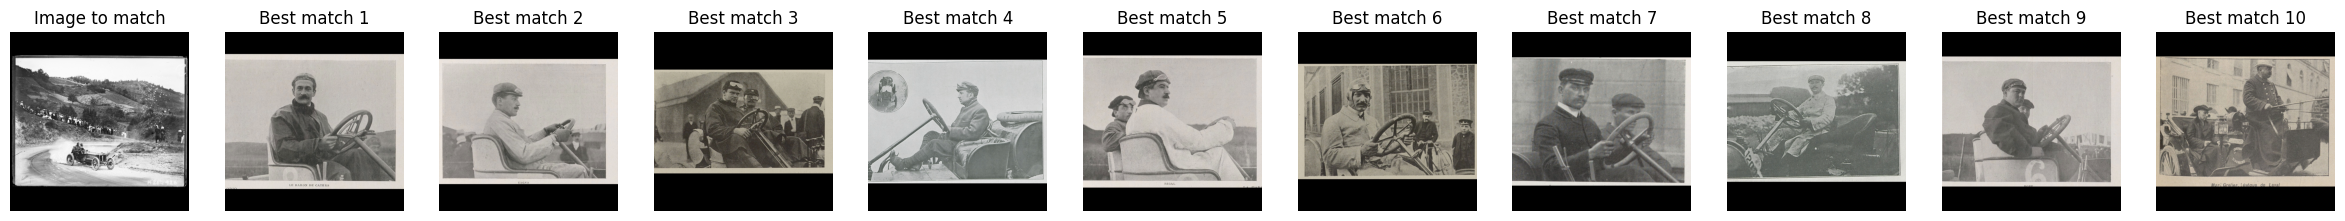

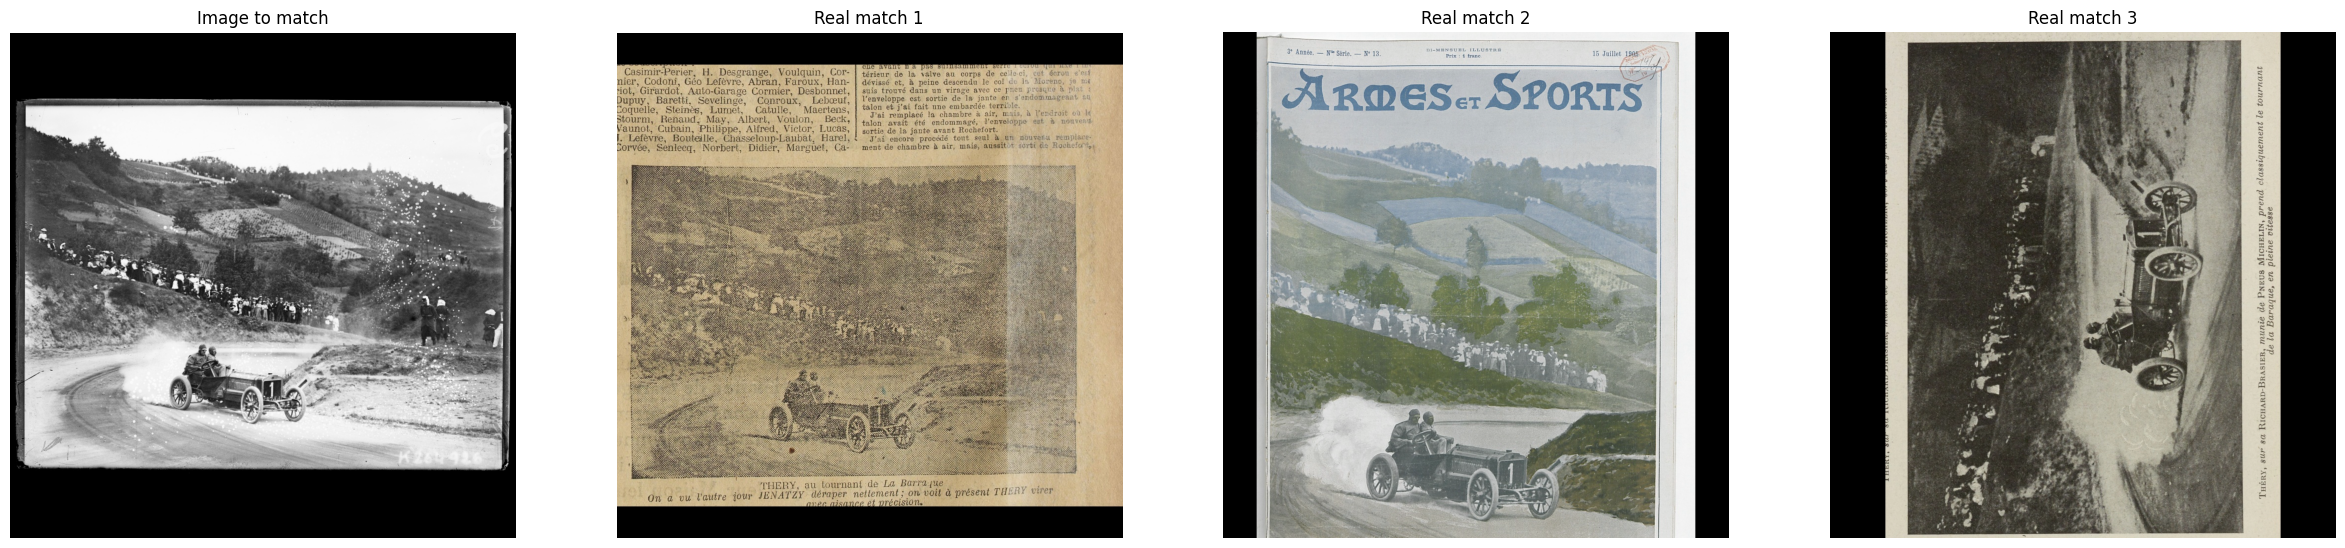

In [8]:
from sklearn.neighbors import NearestNeighbors
from utils.Plotter import Plotter as PL


nb_neighbors = 10

nbrs = NearestNeighbors(n_neighbors=nb_neighbors, algorithm='auto').fit(features_sim)

distances, indices = nbrs.kneighbors([feature_to_match])


print(f"Best matches for image {img_to_match} are :".format(img_to_match))
for i in range(nb_neighbors):
    print(f"{i+1}. {img_sim[indices[0][i]]}, distance : {distances[0][i]}")
print("=====================================")
print(f"Real matches are :")
print(f"1. {img_matched_1} : {SMY.get_distance_between_images(features_im1, feature_to_match)}")
print(f"2. {img_matched_2} : {SMY.get_distance_between_images(features_im2, feature_to_match)}")
print(f"3. {img_matched_3} : {SMY.get_distance_between_images(features_im3, feature_to_match)}")
print("=====================================")

def assert_img_matched_in_best_matches(img_to_match):
    for i in range(nb_neighbors):
        try:
            assert img_to_match in img_sim[indices[0][i]]
            print(f"{img_to_match} in {img_sim[indices[0][i]]}")
        except:
            # print(f"{img_to_match} not in {img_sim[indices[0][i]]}")
            continue

assert_img_matched_in_best_matches(img_matched_1)
assert_img_matched_in_best_matches(img_matched_2)
assert_img_matched_in_best_matches(img_matched_3)


img_real_match = [
    cv2.imread(img_matched_1_path),
    cv2.imread(img_matched_2_path),
    cv2.imread(img_matched_3_path),
]
img_matched = [cv2.imread(os.path.join(img_sim[indices[0][i]])) for i in range(nb_neighbors)]
img_titles = [f"Best match {i+1}" for i in range(nb_neighbors)]

img_matched.insert(0, cv2.imread(os.path.join(path_rol_comp, img_to_match + ".jpg")))
img_real_match.insert(0, cv2.imread(os.path.join(path_rol_comp, img_to_match + ".jpg")))
img_titles.insert(0, "Image to match")


PL.plot_images(img_matched, img_titles, (30, 20))
PL.plot_images(img_real_match, ["Image to match", "Real match 1", "Real match 2", "Real match 3"], (30, 20))